In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import datetime
from pandas import Series
import time
import matplotlib.patches as mpatches
from keras.layers.core import Dense,Activation,Dropout,Flatten,Reshape
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import keras 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping 
from keras.wrappers.scikit_learn import KerasRegressor
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv("biryıllıkveri.csv")
data

,Tarih,Hız(m/s),Yön( ̊ ),Güç(KW),Unnamed: 4,Unnamed: 5
0,11/1/2019 0:00,5.81,22.95,0.00,NaN,NaN
1,11/1/2019 0:10,8.47,35.00,0.00,NaN,NaN
2,11/1/2019 0:20,9.23,33.80,305.14,NaN,NaN
3,11/1/2019 0:30,10.37,31.63,2217.82,NaN,NaN
4,11/1/2019 0:40,11.02,28.91,2264.34,NaN,NaN
...,...,...,...,...,...,...
52699,10/31/2020 23:10,6.20,250.40,393.70,NaN,NaN
52700,10/31/2020 23:20,6.40,254.90,431.05,NaN,NaN
52701,10/31/2020 23:30,5.50,267.10,313.70,NaN,NaN
52702,10/31/2020 23:40,4.90,271.70,191.42,NaN,NaN


In [22]:
data=data.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)


In [23]:
i=0
for i in range(len(data)) :
    mesaj=data["Tarih"][i].split("/")
    data["Tarih"][i]=mesaj[0]+" "+mesaj[1]+" "+mesaj[2]
    
    

In [24]:
data

,Tarih,Hız(m/s),Yön( ̊ ),Güç(KW)
0,11 1 2019 0:00,5.81,22.95,0.00
1,11 1 2019 0:10,8.47,35.00,0.00
2,11 1 2019 0:20,9.23,33.80,305.14
3,11 1 2019 0:30,10.37,31.63,2217.82
4,11 1 2019 0:40,11.02,28.91,2264.34
...,...,...,...,...
52699,10 31 2020 23:10,6.20,250.40,393.70
52700,10 31 2020 23:20,6.40,254.90,431.05
52701,10 31 2020 23:30,5.50,267.10,313.70
52702,10 31 2020 23:40,4.90,271.70,191.42


In [26]:
data['Year']=data['Tarih'].apply(lambda x: time.strptime(x,"%m %d %Y %H:%M")[0])
data['Month']=data['Tarih'].apply(lambda x: time.strptime(x,"%m %d %Y %H:%M")[1])
data['Day']=data['Tarih'].apply(lambda x: time.strptime(x,"%m %d %Y %H:%M")[2])
data['Time_Hours']=data['Tarih'].apply(lambda x: time.strptime(x,"%m %d %Y %H:%M")[3])
data['Time_Minutes']=data['Tarih'].apply(lambda x: time.strptime(x,"%m %d %Y %H:%M")[4])
data.head(10)

,Tarih,Hız(m/s),Yön( ̊ ),Güç(KW),Year,Month,Day,Time_Hours,Time_Minutes
0,11 1 2019 0:00,5.81,22.95,0.00,2019,11,1,0,0
1,11 1 2019 0:10,8.47,35.00,0.00,2019,11,1,0,10
2,11 1 2019 0:20,9.23,33.80,305.14,2019,11,1,0,20
3,11 1 2019 0:30,10.37,31.63,2217.82,2019,11,1,0,30
4,11 1 2019 0:40,11.02,28.91,2264.34,2019,11,1,0,40
5,11 1 2019 0:50,11.08,28.12,2356.71,2019,11,1,0,50
6,11 1 2019 1:00,11.58,25.36,2370.43,2019,11,1,1,0
7,11 1 2019 1:10,12.87,27.98,2546.45,2019,11,1,1,10
8,11 1 2019 1:20,12.48,27.12,2548.11,2019,11,1,1,20
9,11 1 2019 1:30,12.15,28.06,2518.03,2019,11,1,1,30


In [14]:
data

,Tarih,Hız(m/s),Yön( ̊ ),Güç(KW)
0,2019-11-01 00:00:00,5.81,22.95,0.00
1,2019-11-01 00:10:00,8.47,35.00,0.00
2,2019-11-01 00:20:00,9.23,33.80,305.14
3,2019-11-01 00:30:00,10.37,31.63,2217.82
4,2019-11-01 00:40:00,11.02,28.91,2264.34
...,...,...,...,...
52699,2020-10-31 23:10:00,6.20,250.40,393.70
52700,2020-10-31 23:20:00,6.40,254.90,431.05
52701,2020-10-31 23:30:00,5.50,267.10,313.70
52702,2020-10-31 23:40:00,4.90,271.70,191.42


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tarih     52704 non-null  datetime64[ns]
 1   Hız(m/s)  52634 non-null  float64       
 2   Yön( ̊ )  52634 non-null  float64       
 3   Güç(KW)   52634 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


In [7]:
data.max()

Tarih       2020-10-31 23:50:00
Hız(m/s)                  22.45
Yön( ̊ )                    360
Güç(KW)                  2561.4
dtype: object

In [8]:
data.min()

Tarih       2019-11-01 00:00:00
Hız(m/s)                      0
Yön( ̊ )                      0
Güç(KW)                   -4.51
dtype: object

In [9]:
data.corr().nlargest(3,'Güç(KW)').index

Index(['Güç(KW)', 'Hız(m/s)', 'Yön( ̊ )'], dtype='object')

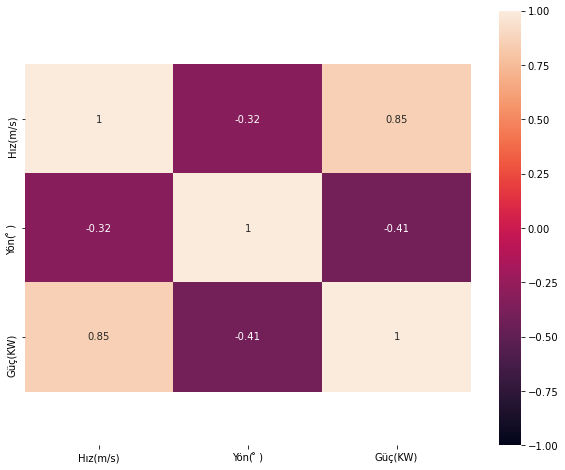

,Hız(m/s),Yön( ̊ ),Güç(KW)
Hız(m/s),1.000000,-0.315178,0.854780
Yön( ̊ ),-0.315178,1.000000,-0.407838
Güç(KW),0.854780,-0.407838,1.000000


In [10]:
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

<AxesSubplot:xlabel='Güç(KW)'>

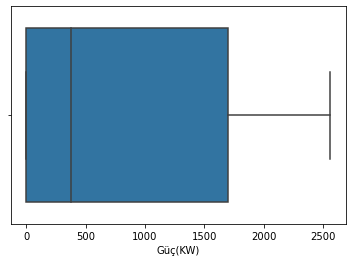

In [11]:
sns.boxplot(x=data['Güç(KW)'])

<AxesSubplot:xlabel='Hız(m/s)'>

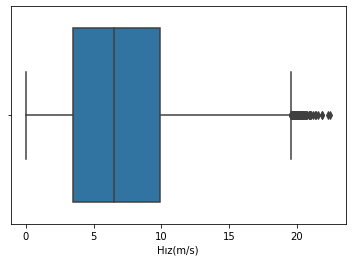

In [12]:
sns.boxplot(x=data['Hız(m/s)'])

In [13]:
data = data.drop(data.index[data['Hız(m/s)'] >= 22])

<AxesSubplot:xlabel='Yön( ̊ )'>

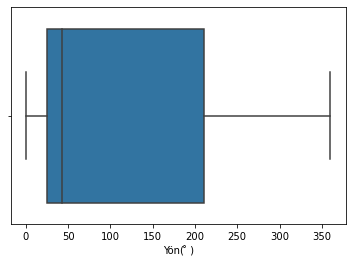

In [14]:
sns.boxplot(x=data['Yön( ̊ )'])

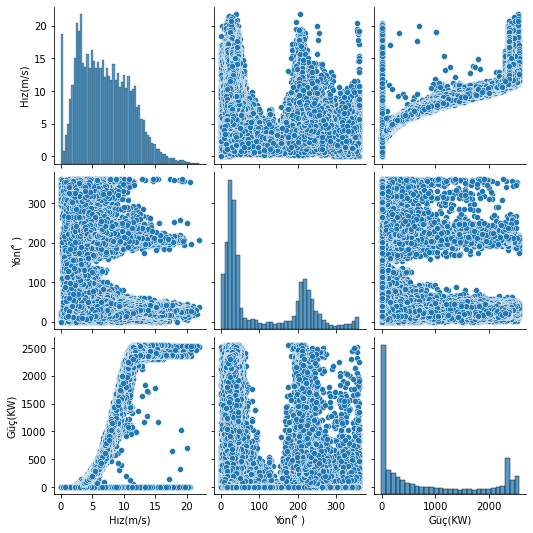

In [15]:
sns.pairplot(data)

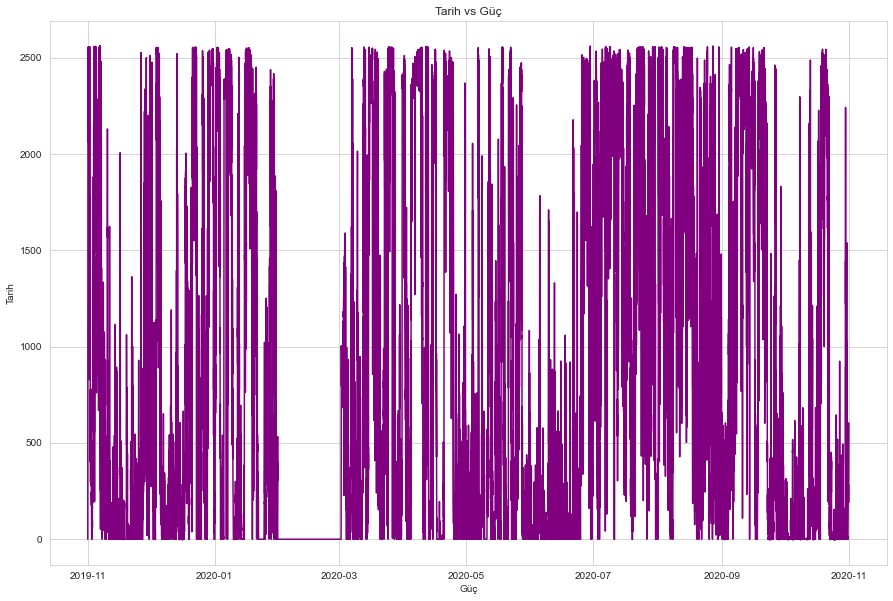

In [54]:
fig, ax = plt.subplots(figsize=(15,10))


ax.plot(data['Tarih'][0:],
        data['Güç(KW)'][0:],
        color='purple')

ax.set(xlabel="Güç",
       ylabel="Tarih",
       title="Tarih vs Güç")

plt.show()

In [61]:
data["Güç(KW)"][0]

0.0

In [17]:
df = data.copy()
df

,Tarih,Hız(m/s),Yön( ̊ ),Güç(KW)
0,2019-11-01 00:00:00,5.81,22.95,0.00
1,2019-11-01 00:10:00,8.47,35.00,0.00
2,2019-11-01 00:20:00,9.23,33.80,305.14
3,2019-11-01 00:30:00,10.37,31.63,2217.82
4,2019-11-01 00:40:00,11.02,28.91,2264.34
...,...,...,...,...
52699,2020-10-31 23:10:00,6.20,250.40,393.70
52700,2020-10-31 23:20:00,6.40,254.90,431.05
52701,2020-10-31 23:30:00,5.50,267.10,313.70
52702,2020-10-31 23:40:00,4.90,271.70,191.42


In [27]:
data = data.dropna()

In [28]:
data["Tarih"] = pd.to_datetime(data["Tarih"], format = "%m %d %Y %H:%M", errors = "coerce")
data

,Tarih,Hız(m/s),Yön( ̊ ),Güç(KW),Year,Month,Day,Time_Hours,Time_Minutes
0,2019-11-01 00:00:00,5.81,22.95,0.00,2019,11,1,0,0
1,2019-11-01 00:10:00,8.47,35.00,0.00,2019,11,1,0,10
2,2019-11-01 00:20:00,9.23,33.80,305.14,2019,11,1,0,20
3,2019-11-01 00:30:00,10.37,31.63,2217.82,2019,11,1,0,30
4,2019-11-01 00:40:00,11.02,28.91,2264.34,2019,11,1,0,40
...,...,...,...,...,...,...,...,...,...
52699,2020-10-31 23:10:00,6.20,250.40,393.70,2020,10,31,23,10
52700,2020-10-31 23:20:00,6.40,254.90,431.05,2020,10,31,23,20
52701,2020-10-31 23:30:00,5.50,267.10,313.70,2020,10,31,23,30
52702,2020-10-31 23:40:00,4.90,271.70,191.42,2020,10,31,23,40


In [29]:
cols = [ 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Tarih,Hız(m/s),Yön( ̊ ),Güç(KW)
0,2019-11-01 00:00:00,5.81,22.95,0.00
1,2019-11-01 00:10:00,8.47,35.00,0.00
2,2019-11-01 00:20:00,9.23,33.80,305.14
3,2019-11-01 00:30:00,10.37,31.63,2217.82
4,2019-11-01 00:40:00,11.02,28.91,2264.34


In [30]:
df = data.copy()

In [31]:
df = df.set_index('Tarih')

In [32]:
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [33]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [34]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [35]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [36]:
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [37]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [39]:
del df['Hız(m/s)']
del df['Yön( ̊ )']
df.head()

,Güç(KW)
Tarih,
2019-11-01 00:00:00,0.00
2019-11-01 00:10:00,0.00
2019-11-01 00:20:00,305.14
2019-11-01 00:30:00,2217.82
2019-11-01 00:40:00,2264.34


In [40]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Güç(KW)
Tarih,
2020-10-31 21:30:00,420.92
2020-10-31 21:40:00,466.62
2020-10-31 21:50:00,522.30
2020-10-31 22:00:00,580.99
2020-10-31 22:10:00,537.51


In [41]:
raw_values = df.values
diff_values = difference(raw_values, 1)
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

51623/51623 [==============================] - 70s 1ms/step - loss: 0.0041


In [42]:
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=78.804814, Expected=62.790000
Hour=2, Predicted=59.427785, Expected=81.990000
Hour=3, Predicted=82.423507, Expected=58.930000
Hour=4, Predicted=59.368136, Expected=92.210000
Hour=5, Predicted=92.951275, Expected=103.920000
Hour=6, Predicted=104.166904, Expected=89.080000
Hour=7, Predicted=90.304534, Expected=90.880000
Hour=8, Predicted=89.564293, Expected=82.450000
Hour=9, Predicted=84.348644, Expected=19.880000
Hour=10, Predicted=19.889530, Expected=16.330000
Hour=11, Predicted=15.297677, Expected=1.830000
Hour=12, Predicted=4.959421, Expected=-0.670000
Hour=13, Predicted=1.123605, Expected=-4.510000
Hour=14, Predicted=-0.631267, Expected=1.330000
Hour=15, Predicted=3.882023, Expected=22.300000
Hour=16, Predicted=23.229052, Expected=25.620000
Hour=17, Predicted=26.869482, Expected=4.640000
Hour=18, Predicted=5.197525, Expected=13.090000
Hour=19, Predicted=15.362153, Expected=45.350000
Hour=20, Predicted=46.765188, Expected=62.070000
Hour=21, Predicted=63.984050, Expe

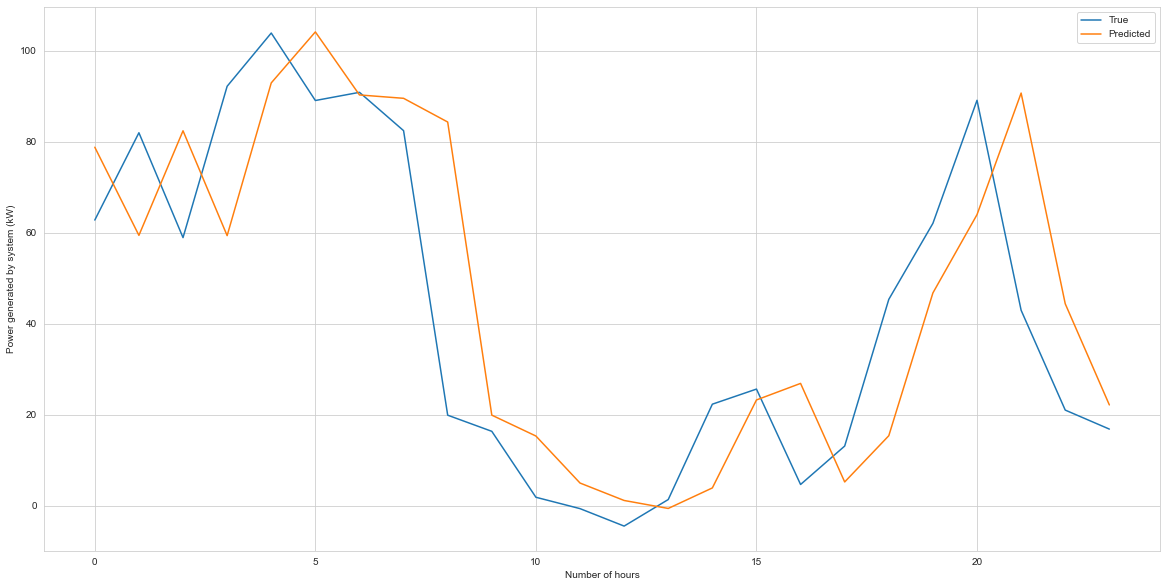

In [44]:
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:24], label="True")
pyplot.plot(predictions_plot[0:24], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()